# Digit Recognizer

## A BEGINNER'S GUIDE

Using
- Multi-layer Perceptron (MLP) Model
- Convolutional Neural Network (CNN) Model
- Keras Neural Network Library

Taken almost straight from https://www.kaggle.com/chapagain/digit-recognizer-beginner-s-guide-mlp-cnn-keras/

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set() # setting seaborn default for plots

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
from keras.datasets import mnist

# for Multi-layer Perceptron (MLP) model
from keras.models import Sequential
from keras.layers import Dense

# for Convolutional Neural Network (CNN) model
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

# fix for issue: https://github.com/fchollet/keras/issues/2681
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


## Loading Train and Test datasets

In [7]:
train = pd.read_csv('train.csv')
print (train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test = pd.read_csv('test.csv')
print (test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y_train = train['label']
X_train = train.drop(labels=['label'], axis=1)
X_test = test

print (y_train.value_counts())

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


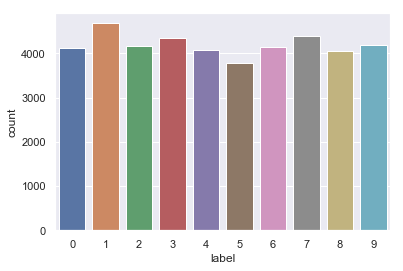

In [10]:
sns.countplot(y_train)

In [11]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# check for corrupted images in the datasets
# i.e. check if there are any empty pixel values
print (X_train.isnull().any().sum())
print (X_test.isnull().any().sum())

0
0


## Get values of data

In [13]:
X_train = X_train.values.astype('float32') # pixel values of all images in train set
y_train = y_train.values.astype('int32') # labels of all images
X_test = test.values.astype('float32') # pixel values of all images in test set

## Viewing shape and content of data

In [14]:
print (X_train.shape)
print (y_train.shape)

(42000, 784)
(42000,)


In [10]:
print (y_train[0])
print (X_train[0])

1
[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  188.  255.   94.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.  191.  250.  253.   93.    0. 

## Plotting images and their class values

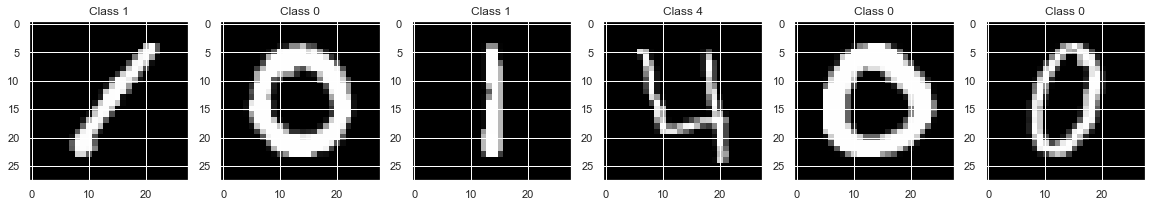

In [15]:
plt.figure(figsize=[20,8])
for i in range(6):
    plt.subplot(1,6,i+1)
    # Here, we reshape the 784 pixels vector values into 28x28 pixels image
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [16]:
# fix random seed for reproducibility
random_seed = 7
np.random.seed(random_seed)

## Normalizing input values

As we can see above, the pixel values for each image are gray scaled between 0 and 255. We now, normalize those values from 0-255 to 0-1.

In [17]:
# pixel values are gray scale between 0 and 255
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
print (X_train[1])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

## Converting target variable values into one-hot format

The output/target variable is in the format 0 to 9. As this is a multi-class classification problem, we convert the output class values into one-hot format which is simply a binary matrix, i.e.

>value 0 will be converted to one-hot format as [1, 0, 0, 0, 0, 0, 0, 0, 0]
>
>value 1 will be converted to one-hot format as [0, 1, 0, 0, 0, 0, 0, 0, 0]
>
>value 2 will be converted to one-hot format as [0, 0, 1, 0, 0, 0, 0, 0, 0]
>
>and so on...


In [18]:
print (y_train.shape)
print (y_train[0])

(42000,)
1


In [19]:
# one hot encode outputs
# note that we have new variables with capital Y
# Y_train is different than y_train
Y_train = np_utils.to_categorical(y_train)
num_classes = Y_train.shape[1]

In [20]:
print (y_train.shape, Y_train.shape)
print (y_train[0], Y_train[0])

(42000,) (42000, 10)
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


## Splitting train dataset into training and validation set

We split the train dataset into two parts in 9:1 ratio. 90% will be the actual training set and the remaining 10% will be the validation/testing set. We train our model using the training set and test the accuracy of the model using the validation set.

In [21]:
# Split the entire training set into two separate sets: Training set and Validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.10, random_state=random_seed)

In [22]:
print (X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)
num_pixels = X_train.shape[1]

(37800, 784) (37800, 10) (4200, 784) (4200, 10)


In [23]:
print (Y_val)
# converting one-hot format of digits to normal values/labels
y_val = np.argmax(Y_val, 1) # reverse of to_categorical
print (y_val)
# Note that: capital Y_val contains values in one-hot format and small y_val contains normal digit values

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
[1 1 4 ... 0 2 2]


## Define Simple Perceptron Model

Generally, neural networks have the following properties:
- an input layer as a single vector
- zero or multiple hidden layers after input layer
- an output layer after hidden layers which represents class scores in classification problem
- each neuron in a hidden layer is fully connected to all neurons in the previous layer
- neurons in a single layer function independently and do not have any connection with other neurons of the same layer

A **single-layer perceptron model** is the simplest kind of neural network where there are only two layers: ***input layer*** and ***output layer***. The inputs are directly fed into the outputs via a series of weights. It's a **[feed-forward network](https://en.wikipedia.org/wiki/Feedforward_neural_network)** where the information moves in only one direction, i.e. forward direction from input nodes to output nodes.

A **multi-layer perceptron model** is the other kind of neural network where there are one or more hidden layers in between input and output layers. The information flows from input layer to hidden layers and then to output layers. These models can be of **feed-forward** type or they can also use **[back-propagation](https://en.wikipedia.org/wiki/Backpropagation)** method. In back-propagation, the error is calculated in the output layer by computing the difference of actual output and predicted output. The error is then distributed back to the network layers. Based on this error, the algorithm will adjust the weights of each connection in order to reduce the error value. This type of learning is also referred as **deep learning**.

We create a **simple neural network** model with **one hidden layer** with 784 neurons. Our input layer will also have 784 neurons as we have flattened out training dataset into a single 784 dimensional vector.

*softmax* activation is used in the output layer.

*adam* gradient descent optimizer is used to learn weights.

In [24]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

## Fit and Evaluate Model

The model is fit over 5 epochs/iteration. It takes a batch of 200 images in each iteration. Validation dataset is used for validation. The epochs may be increased to improve accuracy.

Finally, validation dataset is used to evaluate the model by calculating the model's classification accuracy.

In [25]:
model = baseline_model()
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=5, batch_size=200, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 37800 samples, validate on 4200 samples
Epoch 1/5
37800/37800 [==============================] - 3s 70us/step - loss: 0.3345 - acc: 0.9055 - val_loss: 0.1735 - val_acc: 0.9486
Epoch 2/5
37800/37800 [==============================] - 3s 67us/step - loss: 0.1389 - acc: 0.9606 - val_loss: 0.1242 - val_acc: 0.9657
Epoch 3/5
37800/37800 [==============================] - 3s 68us/step - loss: 0.0903 - acc: 0.9744 - val_loss: 0.1040 - val_acc: 0.9736
Epoch 4/5
37800/37800 [==============================] - 2s 65us/step - loss: 0.0631 - acc: 0.9820 - val_loss: 0.0935 - val_acc: 0.9743
Epoch 5/5
37800/37800 [==============================] - 2s 63us/step - loss: 0.0463 - acc: 0.9870 - val_loss: 0.0826 - val_acc: 0.9795: 0.0464 


In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [27]:
scores = model.evaluate(X_val, Y_val, verbose=0)
print (scores)
print ('Score: {}'.format(scores[0]))
print ('Accuracy: {}'.format(scores[1]))

[0.0825988338390986, 0.9795238095238096]
Score: 0.0825988338390986
Accuracy: 0.9795238095238096


## Plot correctly and incorrectly predicted images

Let's plot some images which are correctly predicted and some images which are incorrectly predicted on our validation dataset.

In [28]:
# get predicted values
predicted_classes = model.predict_classes(X_val)

In [29]:
# get index list of all correctly predicted values
correct_indices = np.nonzero(np.equal(predicted_classes, y_val))[0]

# get index list of all incorrectly predicted values
incorrect_indices = np.nonzero(np.not_equal(predicted_classes, y_val))[0]

In [30]:
print ('Correctly predicted: %i' % np.size(correct_indices))
print ('Incorrectly predicted: %i' % np.size(incorrect_indices))

Correctly predicted: 4114
Incorrectly predicted: 86


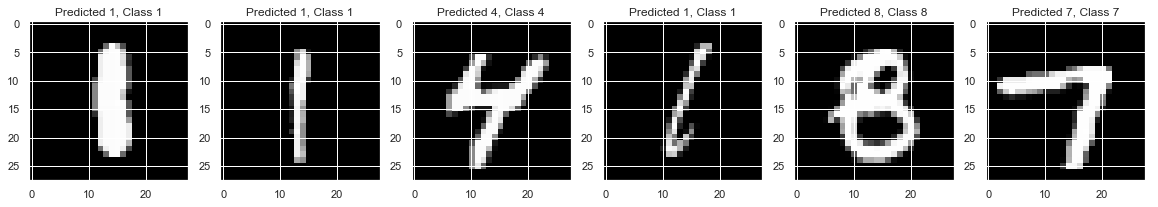

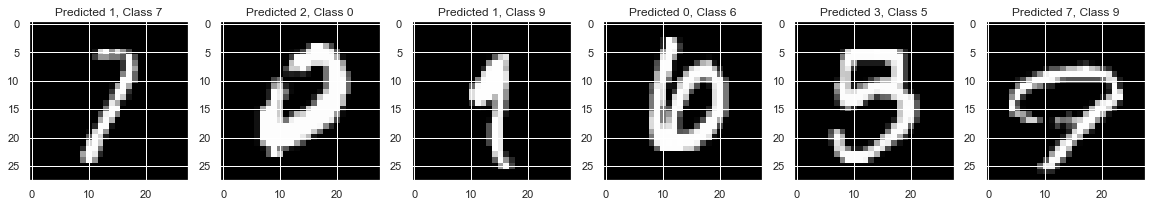

In [31]:
plt.figure(figsize=[20,8])
for i, correct in enumerate(correct_indices[:6]):
    plt.subplot(1,6,i+1)
    plt.imshow(X_val[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_val[correct]))
    
plt.figure(figsize=[20,8])
for i, incorrect in enumerate(incorrect_indices[:6]):
    plt.subplot(1,6,i+1)
    plt.imshow(X_val[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_val[incorrect]))

## Confusion Matrix

Confusion Matrix in Numbers
[[427   0   1   0   0   0   0   0   0   1]
 [  0 495   1   0   0   0   0   1   0   1]
 [  0   2 419   2   1   0   2   6   1   0]
 [  1   0   0 433   0   2   0   4   3   1]
 [  1   0   0   0 389   1   1   3   0   4]
 [  0   0   0   4   2 341   0   0   2   0]
 [  1   0   0   0   3   1 400   0   1   0]
 [  1   1   1   0   0   0   0 434   1   5]
 [  1   3   0   2   1   0   2   0 392   0]
 [  2   1   0   1   4   0   0   6   0 384]]

Confusion Matrix in Percentage
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.97 0.   0.   0.   0.   0.01 0.   0.  ]
 [0.   0.   0.   0.98 0.   0.   0.   0.01 0.01 0.  ]
 [0.   0.   0.   0.   0.97 0.   0.   0.01 0.   0.01]
 [0.   0.   0.   0.01 0.01 0.98 0.   0.   0.01 0.  ]
 [0.   0.   0.   0.   0.01 0.   0.99 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.98 0.   0.01]
 [0.   0.01 0.   0.   0.   0.   0.   0.   0.98 0.  ]
 [0.01 0.   0.   0.   0.01 0.   

"\nplt.subplot(122)\nax = sns.heatmap(df_cnf_matrix_percent, annot=True)\nax.set_ylabel('True values')\nax.set_xlabel('Predicted values')\n"

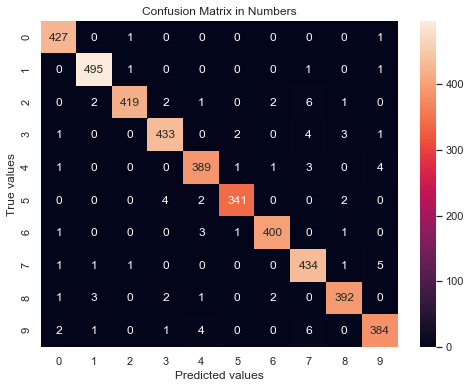

In [32]:
# we have digit labels from 0 to 9
# we can either manually create a class variable with those labels
# class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# or, we can take unique values from train dataset's labels
class_names = np.unique(y_train)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_val, predicted_classes)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = class_names
predicted_class_names = class_names

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (8,6))

#plt.subplot(121)
ax = sns.heatmap(df_cnf_matrix, annot=True, fmt='d')
ax.set_ylabel('True values')
ax.set_xlabel('Predicted values')
ax.set_title('Confusion Matrix in Numbers')

'''
plt.subplot(122)
ax = sns.heatmap(df_cnf_matrix_percent, annot=True)
ax.set_ylabel('True values')
ax.set_xlabel('Predicted values')
'''

Out of 4200 validation data, we got the following correct and incorrect predictions by MLP model:
- Correctly predicted: 4109
- Incorrectly predicted: 91

The above confusion matrix heatmap shows that:
- 9 values of digit 9 were predicted as 7.
- 6 values of digit 3 were perdicted as 8.
- 4 values of digit 4, 5 and 9 were predicted as 9, 3 and 4 respectively.

The accuracy of the model may improve if we increase the epoch/iteration number while fitting the model. Currently, it is set as 5. We can increase it to 10 and see the accuracy output.

# Convolutional Fun!


## Improve Accuracy using Convolution Neural Network (CNN) Model

[Convolutional Neural Networks (CNN)](https://en.wikipedia.org/wiki/Convolutional_neural_network) are similar to Multi-layer Perceptron Neural Networks. They are also made up of neurons that have learnable weights and biases. CNNs have been successfully applied to analyzing visual imagery. They are mostly being applied in image and video recognition, recommender systems and natural language processing.

A CNN consists of multiple hidden layers. The hidden layers are either *convolutional*, *pooling* or *fully connected*.

**Convolution layer:** Feature extraction is done in this layer. This layer applies convolution operation to the input and pass the result to the next layer. In the image classification problem, a weight matrix is defined in the convolution layer. A dot product is computed between the weight matrix and a small part (as the size of the weight matrix) of the input image. The weight runs across the image such that all the pixels are covered at least once, to give a convolved output.

> The weight matrix behaves like a **filter** in an image extracting particular information from the original image matrix. 
>
>A weight combination might be extracting edges, while another one might a particular color, while another one might just blur the unwanted noise.
>
>The weights are learnt such that the loss function is minimized similar to a Multi-layer Perceptron. 
>
>Therefore weights are learnt to extract features from the original image which help the network in correct prediction. 
>
>When we have multiple convolutional layers, the initial layer extract more generic features, while as the network gets deeper, the features extracted by the weight matrices are more and more complex and more suited to the problem at hand.
>
>*Reference: [Architecture of Convolutional Neural Networks (CNNs) demystified](https://www.analyticsvidhya.com/blog/2017/06/architecture-of-convolutional-neural-networks-simplified-demystified/)*

***Stride:*** While computing the dot product, if the weight matrix moves 1 pixel at a time then we call it a stride of 1. Size of the image keeps on reducing as we increase the stride value.

***Padding:*** Padding one or more layer of zeros across the image helps to resolve the output image size reduction issue caused by *stride*. Initial size of the image is retained after the padding is done.

**Pooling layer:** Reduction in number of feature parameters is done in this layer. When the image size is too larger, then we need a pooling layer in-between two convolution layers. This layer helps to reduce the number of trainable parameters of the input image. The sole purpose of pooling is to reduce the spatial size of the image. This layer is also used to control overfitting. 
- Max pooling: Uses maximum value from each of the cluster of the prior layer
- Average pooling: Uses the average value from each of the cluster of the prior layer

**Fully connected layer:** This layer comes after convolution and pooling layers. This layer connects each neuron in one layer to every neuron in another layer. This is similar to the concept of layer connection of Multi-layer perceptron model. Error is computed in the output layer by computing the difference in actual output and predicted output. After that, back-propagation is used to update the weight and biases for error and loss reduction.

## Load train and test data

Let's again load the train and test datasets.

In [34]:
train = pd.read_csv('train.csv')
print (train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
test = pd.read_csv('../input/test.csv')
print (test.shape)
test.head()

FileNotFoundError: File b'../input/test.csv' does not exist

In [36]:
y_train = train['label']
X_train = train.drop(labels=['label'], axis=1)
X_test = test

## Get values of data

In [37]:
X_train = X_train.values.astype('float32') # pixel values of all images in train set
y_train = y_train.values.astype('int32') # labels of all images
X_test = test.values.astype('float32') # pixel values of all images in test set

## View shape and content of data

In [38]:
print (X_train.shape)
print (y_train.shape)
print (X_train[1])

(42000, 784)
(42000,)
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  18.  30. 137. 137.
 192.  86.  72.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  13.  86. 250. 254. 254. 254.
 254. 217. 246. 151.  32.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.  16. 179. 254. 254. 254. 254. 254.
 254. 254. 254. 254. 231.  54.  15.   0.   0.   0.   0.

## Normalizing input values

As we can see above, the pixel values for each image are gray scaled between 0 and 255. We now, normalize those values from 0-255 to 0-1.

In [39]:
# pixel values are gray scale between 0 and 255
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
print (X_train[1])

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.07 0.12 0.54 0.54
 0.75 0.34 0.28 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.05 0.34 0.98 1.   1.   1.
 1.   0.85 0.96 0.59 0.13 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.06 0.7  1.   1.   1.   1.   1.
 1.   1.   1.   1.   0.91 0.21 0.06 0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0

## Converting target variable values into one-hot format

The output/target variable is in the format 0 to 9. As this is a multi-class classification problem, we convert the output class values into one-hot format which is simply a binary matrix, i.e.

>value 0 will be converted to one-hot format as [1, 0, 0, 0, 0, 0, 0, 0, 0]
>
>value 1 will be converted to one-hot format as [0, 1, 0, 0, 0, 0, 0, 0, 0]
>
>value 2 will be converted to one-hot format as [0, 0, 1, 0, 0, 0, 0, 0, 0]
>
>and so on...


In [40]:
print (y_train.shape)
print (y_train[0])

(42000,)
1


In [41]:
# one hot encode outputs
# note that we have new variables with capital Y
# Y_train is different than y_train
Y_train = np_utils.to_categorical(y_train)
num_classes = Y_train.shape[1]

In [42]:
print (y_train.shape, Y_train.shape)
print (y_train[0], Y_train[0])

(42000,) (42000, 10)
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


## Splitting train dataset into training and validation set

We split the train dataset into two parts in 9:1 ratio. 90% will be the actual training set and the remaining 10% will be the validation/testing set. We train our model using the training set and test the accuracy of the model using the validation set.

In [43]:
# Split the entire training set into two separate sets: Training set and Validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.10, random_state=random_seed)

In [44]:
print (X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)
num_pixels = X_train.shape[1]

(37800, 784) (37800, 10) (4200, 784) (4200, 10)


In [45]:
print (Y_val)
# converting one-hot format of digits to normal values/labels
y_val = np.argmax(Y_val, 1) # reverse of to_categorical
print (y_val)
# Note that: capital Y_val contains values in one-hot format and small y_val contains normal digit values

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
[1 1 4 ... 0 2 2]


## Reshaping images

The image dimension expected by Keras for 2D (two-dimensional) convolution is in the format of **[pixels][width][height]**.

For RGB color image, the first dimension (pixel) value would be 3 for the red, green and blue components. It's like having 3 image inputs for every single color image. In our case (for MNIST handwritten images), we have gray scale images. Hence, the pixel dimension is set as 1.

In [46]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
X_val = X_val.reshape(X_val.shape[0], 1, 28, 28).astype('float32')

print (num_pixels, X_train.shape, X_test.shape, X_val.shape)

784 (37800, 1, 28, 28) (28000, 1, 28, 28) (4200, 1, 28, 28)


In [47]:
print (X_train[1])

[[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.3  0.99 0.4  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.79 0.99 0.85 0.   0.   0.   0.   0.   0.   0.   0.   0

## Define Convolutional Neural Network (CNN) Model

**Convolution Layer**
- We define 32 feature maps with the size of 5x5 matrix
- We use ReLU (Rectified Linear Units) as the activation function
- This layer expects input image size of 1x28x28 ([pixels][height][weight])

**Max Pooling Layer**
- It has a pool size of 2x2

**Dropout Layer**
- Configured to randomly exclude 20% of neurons in the layer to reduce overfitting

**Flatten**
- Flattens the image into a single dimensional vector which is required as input by the fully connected layer

**Fully connected Layer**
- Contains 128 neurons
- relu is used as an activation function
- Output layer has num_classes=10 neurons for the 10 classes
- softmax activation function is used in the output layer
- adam is used as optimizer to learn and update weights

In [48]:
# baseline model for CNN
def baseline_model():
    # create model    
    model = Sequential()    
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))    
    model.add(MaxPooling2D(pool_size=(2, 2)))    
    model.add(Dropout(0.2))
    model.add(Flatten())    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))    
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])    
    return model

To compile the model, there are [different optimizers](https://keras.io/optimizers/) present in Keras like Stochastic Gradient Descent optimizer, Adam optimizer, RMSprop optimizer, etc.

In [49]:
# Example of using RMSprop optimizer
#from keras.optimizers import RMSprop, SGD
#model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), metrics=['accuracy'])

## Fit and Evaluate Model

The model is fit over 5 epochs/iteration. It takes a batch of 200 images in each iteration. Validation data is used as validation set. The epochs may be increased to improve accuracy.

Finally, validation data is used to evaluate the model by calculating the model's classification accuracy.

In [50]:
model = baseline_model()
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=5, batch_size=200, verbose=1)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 37800 samples, validate on 4200 samples
Epoch 1/5
37800/37800 [==============================] - 16s 434us/step - loss: 0.3094 - acc: 0.9105 - val_loss: 0.1091 - val_acc: 0.9726
Epoch 2/5
37800/37800 [==============================] - 18s 474us/step - loss: 0.0967 - acc: 0.9715 - val_loss: 0.0808 - val_acc: 0.9779
Epoch 3/5
37800/37800 [==============================] - 23s 600us/step - loss: 0.0653 - acc: 0.9794 - val_loss: 0.0560 - val_acc: 0.9852
Epoch 4/5
37800/37800 [==============================] - 20s 538us/step - loss: 0.0496 - acc: 0.9842 - val_loss: 0.0562 - val_acc: 0.9838
Epoch 5/5
37800/37800 [==============================] - 19s 513us/step - loss: 0.0436 - acc: 0.9862 - val_loss: 0.0533 - val_acc: 0.9860


In [51]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Text(0, 0.5, 'Loss')

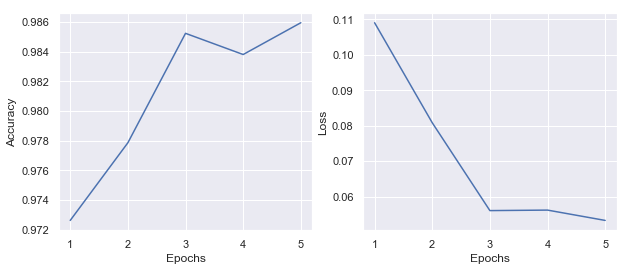

In [52]:
plt.figure(figsize=[10,4])

plt.subplot(121)
plt.plot(range(1, len(history_dict['val_acc'])+1), history_dict['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(122)
plt.plot(range(1, len(history_dict['val_loss'])+1), history_dict['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 24, 24)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 12, 12)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 12, 12)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
_________________________________________________________________


In [53]:
scores = model.evaluate(X_val, Y_val, verbose=0)
print (scores)
print ('Score: {}'.format(scores[0]))
print ('Accuracy: {}'.format(scores[1]))

[0.053263963722579535, 0.9859523809523809]
Score: 0.053263963722579535
Accuracy: 0.9859523809523809


Accuracy (98.64%) of Convolution Neural Network (CNN) model has improved as compared to the accuracy (97.83%) of Multi-layer Perceptron (MLP) model. 

The accuracy of CNN model can be further increased by:
- increasing the epoch number while fitting the model
- adding more convolution and pooling layers to the model

## Plot correctly and incorrectly predicted images

Let's plot some images which are correctly predicted and some images which are incorrectly predicted on our test dataset.

In [54]:
# get predicted values
predicted_classes = model.predict_classes(X_val)

In [55]:
# get index list of all correctly predicted values
correct_indices = np.nonzero(np.equal(predicted_classes, y_val))[0]

# get index list of all incorrectly predicted values
incorrect_indices = np.nonzero(np.not_equal(predicted_classes, y_val))[0]

In [56]:
print ('Correctly predicted: %i' % np.size(correct_indices))
print ('Incorrectly predicted: %i' % np.size(incorrect_indices))

Correctly predicted: 4141
Incorrectly predicted: 59


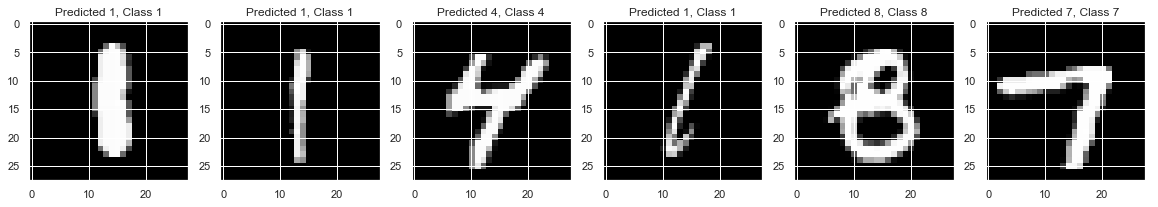

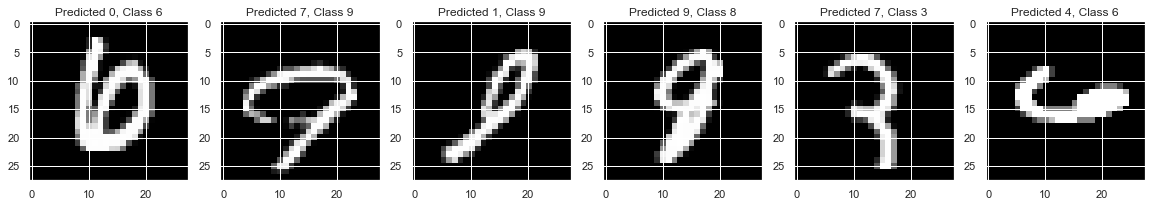

In [57]:
plt.figure(figsize=[20,8])
for i, correct in enumerate(correct_indices[:6]):
    plt.subplot(1,6,i+1)
    plt.imshow(X_val[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_val[correct]))
    
plt.figure(figsize=[20,8])
for i, incorrect in enumerate(incorrect_indices[:6]):
    plt.subplot(1,6,i+1)
    plt.imshow(X_val[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_val[incorrect]))

## Confusion Matrix

Confusion Matrix in Numbers
[[428   0   0   1   0   0   0   0   0   0]
 [  0 493   2   0   0   0   0   2   0   1]
 [  0   0 427   0   2   0   0   4   0   0]
 [  1   0   1 437   0   1   0   1   2   1]
 [  2   0   0   0 390   0   1   2   0   4]
 [  1   0   0   2   0 345   1   0   0   0]
 [  1   0   0   0   2   1 402   0   0   0]
 [  1   0   1   0   0   0   0 435   0   6]
 [  1   3   1   0   0   0   0   0 394   2]
 [  1   1   0   1   1   0   0   3   1 390]]

Confusion Matrix in Percentage
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.99 0.   0.   0.   0.   0.01 0.   0.  ]
 [0.   0.   0.   0.98 0.   0.   0.   0.   0.   0.  ]
 [0.01 0.   0.   0.   0.98 0.   0.   0.01 0.   0.01]
 [0.   0.   0.   0.01 0.   0.99 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.99 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.98 0.   0.01]
 [0.   0.01 0.   0.   0.   0.   0.   0.   0.98 0.  ]
 [0.   0.   0.   0.   0.   0.   

"\nplt.subplot(122)\nax = sns.heatmap(df_cnf_matrix_percent, annot=True)\nax.set_ylabel('True values')\nax.set_xlabel('Predicted values')\n"

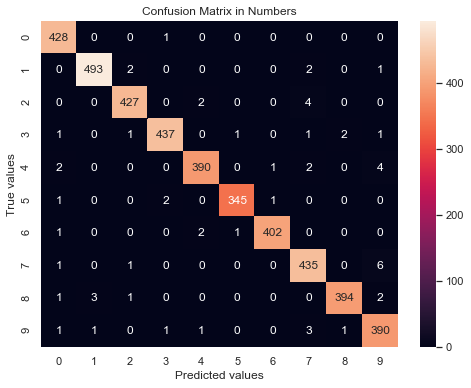

In [58]:
# we have digit labels from 0 to 9
# we can either manually create a class variable with those labels
# class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# or, we can take unique values from train dataset's labels
class_names = np.unique(y_train)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_val, predicted_classes)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = class_names
predicted_class_names = class_names

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (8,6))

#plt.subplot(121)
ax = sns.heatmap(df_cnf_matrix, annot=True, fmt='d')
ax.set_ylabel('True values')
ax.set_xlabel('Predicted values')
ax.set_title('Confusion Matrix in Numbers')

'''
plt.subplot(122)
ax = sns.heatmap(df_cnf_matrix_percent, annot=True)
ax.set_ylabel('True values')
ax.set_xlabel('Predicted values')
'''

### MLP Model outcome

Out of 4200 validation data, we had got the following correct and incorrect predictions by MLP model:
- Correctly predicted: 4109
- Incorrectly predicted: 91

Using Multi-layer Perceptron (MLP) Model, we had the following heatmap outcome:
- 9 values of digit 9 were predicted as 7.
- 6 values of digit 3 were perdicted as 8.
- 4 values of digit 4, 5 and 9 were predicted as 9, 3 and 4 respectively.

### CNN Model outcome

Out of 4200 validation data, we had got the following correct and incorrect predictions by CNN model:
- Correctly predicted: 4146
- Incorrectly predicted: 57

Using Convolutional Neural Network (CNN) Model, we had the following improvements:
- Number 9 predicted as 7 has been reduced from 9 to 7 times.
- Number 3 predicted as 8 has been reduced from 6 to 1 times.
- Number 4,9 predicted as 9,4 repectively has been reduced from 4 times to 2 times.

The accuracy of CNN model can be further increased by:
- increasing the epoch/iteration number while fitting the model
- adding more convolution and pooling layers to the model

## Improving accuracy using multiple CNN layer

Let's try adding multiple convolution layers (*Conv2D*) and multiple fully-connected layers (*Dense*) as well.

>The second Convolution layer will have 15 filters with the size of 3x3 matrix.
>
>The second fully-connected layer will have 50 neurons.

We also use 10 epochs this time instead of 5.

In [59]:
def baseline_model():
    # create model
    model = Sequential()
    
    model.add(Conv2D(filters=30, kernel_size=(5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(filters=15, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.25))
    
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [60]:
# build the model
model = baseline_model()

# fit the model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=200)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 24s 629us/step - loss: 0.4404 - acc: 0.8558 - val_loss: 0.0932 - val_acc: 0.9729
Epoch 2/10
37800/37800 [==============================] - 26s 693us/step - loss: 0.1231 - acc: 0.9606 - val_loss: 0.0644 - val_acc: 0.9798
Epoch 3/10
37800/37800 [==============================] - 25s 674us/step - loss: 0.0867 - acc: 0.9725 - val_loss: 0.0549 - val_acc: 0.9857
Epoch 4/10
37800/37800 [==============================] - 26s 679us/step - loss: 0.0721 - acc: 0.9777 - val_loss: 0.0497 - val_acc: 0.9857
Epoch 5/10
37800/37800 [==============================] - 27s 712us/step - loss: 0.0623 - acc: 0.9797 - val_loss: 0.0463 - val_acc: 0.9874
Epoch 6/10
37800/37800 [==============================] - 26s 681us/step - loss: 0.0566 - acc: 0.9825 - val_loss: 0.0398 - val_acc: 0.9883
Epoch 7/10
37800/37800 [==============================] - 27s 715us/step - loss: 0.0505 - acc: 0.9835 - val_loss: 0.0

In [61]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Text(0, 0.5, 'Loss')

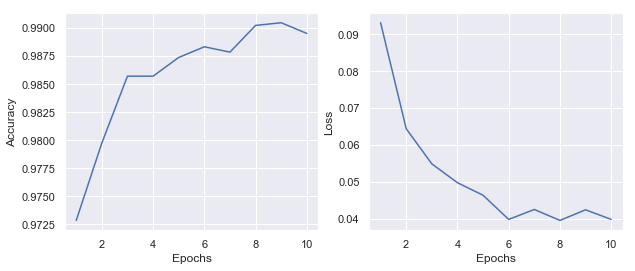

In [62]:
plt.figure(figsize=[10,4])

plt.subplot(121)
plt.plot(range(1, len(history_dict['val_acc'])+1), history_dict['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(122)
plt.plot(range(1, len(history_dict['val_loss'])+1), history_dict['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 12, 12)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 10, 10)        4065      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 5, 5)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 5, 5)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 375)               0         
__________

In [63]:
scores = model.evaluate(X_val, Y_val, verbose=0)
print (scores)
print ('Score: {}'.format(scores[0]))
print ('Accuracy: {}'.format(scores[1]))

[0.03978584379767112, 0.9895238095238095]
Score: 0.03978584379767112
Accuracy: 0.9895238095238095


Accuracy has improved from **98.64%** to **99.00%**.

## References

- [Handwritten Digit Recognition using Convolutional Neural Networks in Python with Keras](https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/)
- [Building a simple neural-network with Keras](https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb)
- [Architecture of Convolutional Neural Networks (CNNs) demystified](https://www.analyticsvidhya.com/blog/2017/06/architecture-of-convolutional-neural-networks-simplified-demystified/)
- [Welcome to deep learning (CNN 99%)](https://www.kaggle.com/toregil/welcome-to-deep-learning-cnn-99)
- [Introduction to CNN Keras - 0.997 (top 6%)](https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6)
